## 데이터 불러오기

In [3]:
import pandas as pd

df21= pd.read_csv('C:/Users/user/Documents/에이콘아카데미/최종/통합/inte21_v1.csv',encoding='cp949')


In [5]:
df22=pd.read_csv('C:/Users/user/Documents/에이콘아카데미/최종/통합/inte22_v1.csv',encoding='cp949')

In [7]:
df21.isnull().sum()

year              0
month             0
day               0
sm                0
longitude         0
latitude          0
start_day         0
2021_elevation    0
2021_slope        0
geometry          0
법정동명              0
RI_NM             0
일시                0
시군구               0
일강수량(mm)          0
dtype: int64

In [9]:
df = pd.concat([df21, df22], ignore_index=True)

In [11]:
df.isnull().sum()

year                  0
month                 0
day                   0
sm                    0
longitude             0
latitude              0
start_day             0
2021_elevation    47041
2021_slope        47041
geometry              0
법정동명                  0
RI_NM                 0
일시                    0
시군구                   0
일강수량(mm)              0
2022_elevation    23740
2022_slope        23740
dtype: int64

In [13]:
df.dtypes

year                int64
month               int64
day                 int64
sm                float64
longitude         float64
latitude          float64
start_day          object
2021_elevation    float64
2021_slope        float64
geometry           object
법정동명               object
RI_NM              object
일시                 object
시군구                object
일강수량(mm)          float64
2022_elevation    float64
2022_slope        float64
dtype: object

In [17]:
df1= pd.read_csv('C:/Users/user/Documents/에이콘아카데미/최종/산사태/경북_21,22년_산사태_이력.csv')

In [67]:
df.columns

Index(['year', 'month', 'day', 'sm', 'longitude', 'latitude', 'start_day',
       '2021_elevation', '2021_slope', 'geometry', '법정동명', 'RI_NM', '일시',
       '시군구', '일강수량(mm)', '2022_elevation', '2022_slope', 'history'],
      dtype='object')

In [23]:
# 혼동행렬, 정밀도, 재현율, 정밀도 재현율 조화평균
#  macro avg (단순 평균)
# precision: (0.84 + 0.82) / 2 = 0.83

# recall: (0.93 + 0.66) / 2 = 0.795 ≈ 0.79

# f1-score: (0.88 + 0.73) / 2 = 0.805 ≈ 0.81

# → 클래스 간 중요도를 동일하게 봤을 때 모델 성능

# weighted avg (support 비중 가중 평균)
# 예: f1 = (9386 × 0.88 + 4771 × 0.73) / (9386 + 4771) ≈ 0.83

# → 실제 데이터 비율에 따라 전체 성능을 평가

In [27]:
df2= pd.read_csv('C:/Users/user/Documents/에이콘아카데미/최종/통합/merged_result (2).csv')

In [29]:
df2.columns

Index(['year', 'month', 'day', 'sm', 'longitude', 'latitude', 'start_day',
       'elevation', 'slope', 'geometry', '법정동명', 'RI_NM', '일시', '시군구',
       '일강수량(mm)', 'matched_latitude', 'matched_longitude', 'matched_mean',
       'distance_km'],
      dtype='object')

In [31]:
df1['start_day'].value_counts()

start_day
2022-09-06    73
2021-08-23    53
2021-07-05     1
Name: count, dtype: int64

In [131]:
df3['start_day'].unique()

array(['2021-07-05', '2021-08-23', '2022-09-06'], dtype=object)

In [137]:
df1['상세주소.3'].unique()

array(['사천리', '침곡리', '봉계리', '두마리', '상사리', '월평리', '매현리', '상옥리', '석계리',
       '합덕리', '구평리', '현내리', '추량리', '보현리', '옥계리', '정각리', '용계리', '자천리',
       '하송리', '용소리', '입석리', '중기리', '무계리', '사촌리', '칠봉리', nan, '신당리', '대현리',
       '일부리', '장항리', '용동리', '안동리', '범곡리', '권이리', '입천리', '안심리', '송선리',
       '모량리', '국당리', '장암리', '미평리', '영천리', '광산리', '용사리', '대보리', '산서리',
       '정천리', '서촌리', '대곡리', '항사리', '진전리', '원리', '중명리', '인주리', '우복리',
       '중훙리', '상정리', '마산리', '홍계리', '장동리', '산여리', '대각리', '남성리', '공수리',
       '후동리', '성동리', '삼정리', '병포리', '눌태리', '구룡포리'], dtype=object)

In [139]:
df1['상세주소.3'].value_counts()

상세주소.3
두마리    8
합덕리    7
상사리    5
홍계리    5
현내리    4
      ..
송선리    1
모량리    1
국당리    1
장암리    1
안심리    1
Name: count, Length: 69, dtype: int64

In [141]:
df3['RI_NM'].unique()

array(['금호리', '마곡리', '효동리', ..., '현흥리', '한사리', '마현리'], dtype=object)

In [143]:
df3['RI_NM'].value_counts()

RI_NM
대현리    149
금곡리    137
대곡리    133
고선리    128
신원리    123
      ... 
증촌리      1
조사리      1
대은리      1
중성리      1
마현리      1
Name: count, Length: 1883, dtype: int64

In [157]:
ri_names = df1['상세주소.3'].unique()

df3['history'] = df3['RI_NM'].isin(ri_names).astype(int)
df3['history'].value_counts()

C:\Users\user\AppData\Local\Temp\ipykernel_8980\1974732823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['history'] = df3['RI_NM'].isin(landslide_ri_names).astype(int)


history
0    22283
1     1573
Name: count, dtype: int64

In [161]:
df3.columns

Index(['year', 'month', 'day', 'sm', 'longitude', 'latitude', 'start_day',
       'elevation', 'slope', 'geometry', '법정동명', 'RI_NM', '일시', '시군구',
       '일강수량(mm)', 'matched_latitude', 'matched_longitude', 'matched_mean',
       'distance_km', 'history'],
      dtype='object')

In [35]:
ml_kb = df3[['matched_mean','elevation', 'slope','sm','일강수량(mm)','history']]

NameError: name 'df3' is not defined

In [165]:
ml_kb['history'].value_counts()

history
0    22283
1     1573
Name: count, dtype: int64

## 머신러닝 1차 시도 -- 로지스틱 회귀 (0,1 재현율 극단적)

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


X = ml_kb[['matched_mean', 'elevation', 'slope', 'sm', '일강수량(mm)']]
y = ml_kb['history']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


y_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.3).astype(int)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


[[  36 4421]
 [   1  314]]
              precision    recall  f1-score   support

           0       0.97      0.01      0.02      4457
           1       0.07      1.00      0.12       315

    accuracy                           0.07      4772
   macro avg       0.52      0.50      0.07      4772
weighted avg       0.91      0.07      0.02      4772



## 재현율, 정밀도 상관관계 분석

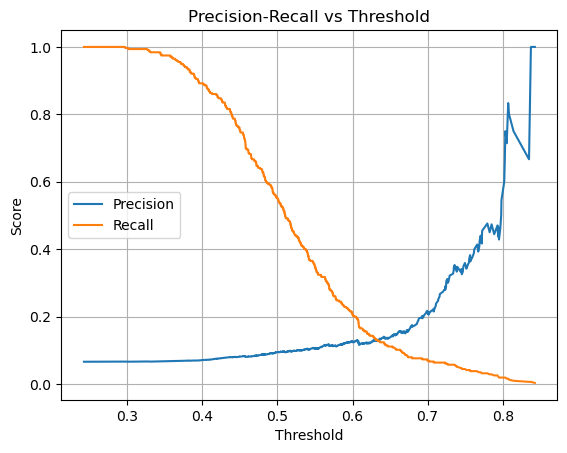

In [173]:


import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.title("Precision-Recall vs Threshold")
plt.show()

## 머신러닝 1차 시도 -- 로지스틱 회귀[파라미터 조정] (0,1 재현율 극단적)

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

X = ml_kb[['matched_mean','elevation', 'slope','sm','일강수량(mm)']]
y = ml_kb['history']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4457    0]
 [ 315    0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      4457
           1       0.00      0.00      0.00       315

    accuracy                           0.93      4772
   macro avg       0.47      0.50      0.48      4772
weighted avg       0.87      0.93      0.90      4772



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [177]:
ml_kb.to_csv('C:/Users/user/Documents/에이콘아카데미/최종/통합/경북_머신러닝.csv')

In [40]:
## pip install imbalanced-learn

## xgboost, 파라미터  사용 -- 비선형 모델 (최종 채택)

In [197]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Recalculate scale_pos_weight from training set
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Train XGBoost without SMOTE, just using scale_pos_weight
model_no_smote = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42
)
model_no_smote.fit(X_train_scaled, y_train)

# Predict probabilities and apply threshold tuning
y_proba_no_smote = model_no_smote.predict_proba(X_test_scaled)[:, 1]
y_pred_no_smote = (y_proba_no_smote > 0.4).astype(int)

# Evaluate
conf_matrix_no_smote = confusion_matrix(y_test, y_pred_no_smote)
report_no_smote = classification_report(y_test, y_pred_no_smote, zero_division=0)
roc_auc_no_smote = roc_auc_score(y_test, y_proba_no_smote)

print(conf_matrix_no_smote, report_no_smote, roc_auc_no_smote)


[[3922  535]
 [ 101  214]]               precision    recall  f1-score   support

           0       0.97      0.88      0.93      4457
           1       0.29      0.68      0.40       315

    accuracy                           0.87      4772
   macro avg       0.63      0.78      0.66      4772
weighted avg       0.93      0.87      0.89      4772
 0.8707561852053664


In [42]:
## pip install shap xgboost

## 컬럼별 영향도(가중치) 분석 시각화

C:\Users\user\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  pl.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from font(s) DejaVu Sans.
  pl.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  pl.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  pl.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyp

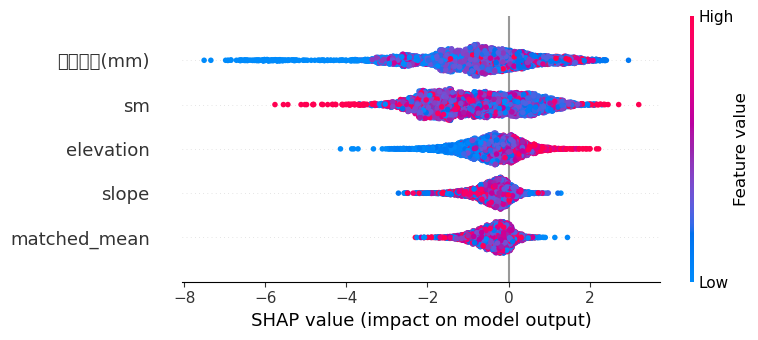

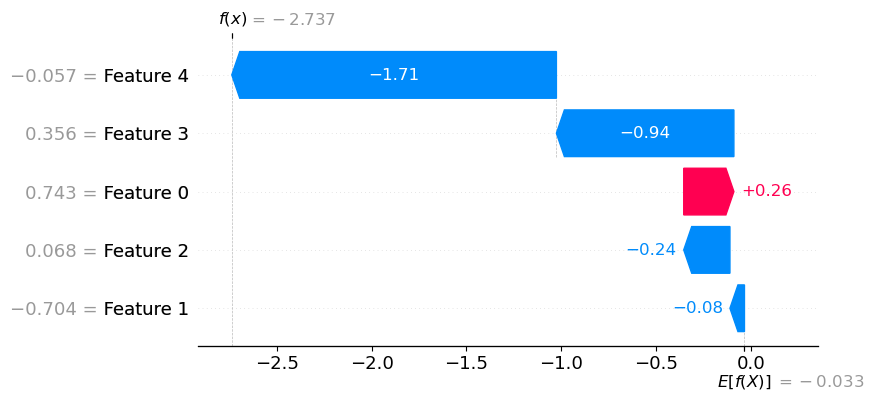

In [201]:
import shap
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv('경북_머신러닝.csv')

X = df[['matched_mean', 'elevation', 'slope', 'sm', '일강수량(mm)']]
y = df['history']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. XGBoost 모델 학습 (scale_pos_weight 반영)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss', random_state=42)
model.fit(X_train_scaled, y_train)

# 3. SHAP 분석
explainer = shap.Explainer(model)
shap_values = explainer(X_test_scaled)

# 4. 요약 그래프 (전체 변수 중요도)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# 5. 개별 예측 해석 (예: 0번째 샘플)
shap.plots.waterfall(shap_values[0])


In [44]:
## pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


## 최종 영향도 분석

In [207]:
import shap
import pandas as pd
import numpy as np

explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

mean_shap_df = pd.DataFrame({
    'feature': X.columns,
    'mean_abs_shap': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='mean_abs_shap', ascending=False)

print(mean_shap_df)


 99%|===================| 4738/4772 [00:16<00:00]        

        feature  mean_abs_shap
4      일강수량(mm)       1.182433
3            sm       0.978405
1     elevation       0.559139
2         slope       0.379025
0  matched_mean       0.364736
